**Memory Management**

Helps to write more efficient code. <br>
what's a variables? <br>
Python has names not variables. <br>

How are python objects stored in memory ? <br>
names --> references --> Objects <br>

A name is just a label for an object and each object can have lots of names. <br>

a = 10 <br>
b = 100 <br> 





**Different Types of objects**
Simple: numbers and strings. <br>
Containers: dict, list,user defined-classes. <br> 

what is reference? A name or a container object pointing at another objet. <br>

what is reference count ? Number of references  you have. <br>

How can we increase the ref count ? <br>
x = 300<br>
y = 300<br>
z = [ 300,300]

How to decrease ref count ? <br>
del x <br>

wat does del do ? <br>
1. It doesn't delete objects. But, it removes that names as a reference to that object and decrease the ref count by one<br>
2. Changing the reference. y = None <br>
3. Going out of scope: using fuctions <br>




In [2]:
def print_word(): 
    word = 'Seven' # ref count + 1 
    print('Word is' + word ) 

print_word() #'Seven' is out of scope, ref count - 1 

Word isSeven


**Local vs global namespace** <br>
if refcounts decreases when an object goes out of scope, what happens to objects in the global namespace? <br>
Never go out of scope ! and never ref count is 0 <br>


Internally python object holds 3 things: its type, its value and a reference count.<br>

Names: x and y holds 3 things. <br>

Don't try this in interactive environment( REPL) <br>
>>> x = 100 <br>
>>> y = 100 <br>
>>> print(id(x)) <br>
140014639122752 <br>
>>> print(id(y)) <br>
140014639122752 <br>
>>> x is y
True

What is Garbage Collection ? <br>
A way for a program to automatically release memory when the object taking up that space is no longer in use.<br>


Two main types of garbage Collection ? <br>
1. Reference Counting<br>
2. Tracing <br>

How does ref count works? <br>
Add and remove references and when refcount reaches 0, then deletes the objects. <br>
Advantages: <br>
Easy to implement.<br>
when refcount is 0 objects are immediately deleted.<br>

Disadv:<br>
Lot of memory consumed due to ref count is stored for every object. <br>
Execution overhead ref count changed on every assignment.<br>

Not generally thread safe.<br>
Ref count counting doesn't detect cyclical references.<br>

In [5]:
class Node(object):
    def __init__(self,value):
        self.value = value
    def next(self,next):
        self.next = next

In [11]:
root = Node('root')
left = Node('left')
right = Node('right')


root.next(left)
left.next(right)
right.next(left)

#root (rc=1) --> left(rc=3)--> right(rc=2)
#            <---

#what is cyclical references
del root # rc = 0 then delete all objects 
del left # still two objects ref together
del right

Tracing GC: uses Mark and Sweep. first, it marks objects and deletes all objects.<br>
What does Python use ? <br>
Both ref count + Generational garbage collection<br>


Generational Garbage Collection is based on objects remved based on threshold value count.<br>
Python maintain a list of every object and actually, it makes 3.<br>
generation0, generation1 and generation2.<br>
Newly created objects are stored in generaion 0.<br>
Only container objects with a refcount greater than 0 will be stored in a generationlist.<br>
When the number of objects in a generation reaches a threshold , python runs a garbage collection algorithm.<br>


what happens during a generational garbage collection cycle? <br>
Python makes a list for objects to discard.<br>
It runs an algorithms to detect reference cycles<br>
If an object has no outside references, it's put on the discard list.<br>
when the cycle is done, if frees up the objects on the discard list. <br>



The __del__ magic method. <br>
It's called a "destructor"<br>
Not a del statement.<br>


what are slots ?<br>


In [13]:
class Dog(object):
    pass

buddy = Dog()
buddy.name = "harsha"
buddy.__dict__

{'name': 'harsha'}

In [14]:
'Pug'.name = 'test'

AttributeError: 'str' object has no attribute 'name'

In [18]:
#slots ??

class Point(object):
    __slots__ = ('x','y') #Tuple is the data type for slots
    
    
point = Point()
point.x = 5
point.y = 7

point.name = "harsha" # it doesn't have internal dict;

AttributeError: 'Point' object has no attribute 'name'

In [21]:
#size of dict vs size of tuple

import sys
print( sys.getsizeof( dict())) ##due to avoid the collision in the heap
print( sys.getsizeof( tuple() ))

240
48


Global Interpreter Lock:<br>
One GIL for each interpreter.<br>
only one thread can run in the interpreter at a time.<br>

Advantages of GIL: fast and simple GC;<br>
Disadvantages: No matter how many threads exists, only one thread will be executed at a time. <br>

use multiple CPU's? use Multi-processing instead of threading.So that, each process will have it's own GIL <br>

**Dissecting memory mysteries**

MemoryError exception <br>
Python memory keeps bloating <br>
No RAM extension possible<br>
How to scale applications<br>

Python memory allocator<br>

Python Object Allocator ( simle or container objects) --> Private Heap --> Python Raw Memory Allocator --> General Purpose Allocator(Malloc) -->OS memory manager

Everything is an object. <br>
Object = { Identity, Value, Type }<br>

In Value, two types Mutable and Immutable.<br>



Dissect Problems:
1. Interning.<br>
Optimization for speed.<br>
small objects <= 256Byts # Handle by python<br>
Performace Objects?

In [49]:
#Problem 1: Observer memory still occupied and after del

def freelist():
    l = range(999999)
    del l
    return 


In [50]:
run  probelm_1.py

Filename: C:\Users\hl3\OneDrive - DXC Production\heap\py\probelm_1.py

Line #    Mem usage    Increment   Line Contents
     4     26.1 MiB     26.1 MiB   @profile
     5                             def freelist():
     6     26.1 MiB      0.0 MiB       l = range(999999)
     7     26.1 MiB      0.0 MiB       del l
     8     26.1 MiB      0.0 MiB       return 




In [51]:
#Problem 2: Object Model Behavior:
# a = 100
# b = 100
# L1 = [ a,b]
# L2 = [a,b ]

In [57]:
#Problem 3: Python data size: 
# sys.getsizeof()

from sys import getsizeof

print( getsizeof("hello"))
print( getsizeof(2**64))
print( getsizeof(123))
print( getsizeof(3.1456))
print( getsizeof(None))
print( getsizeof(""))

#Conatiner
print()
print( getsizeof([]))
print( getsizeof( () ))
print( getsizeof((1,2,3)))
print( getsizeof({}))
print( getsizeof( { 'a': 1, 'b': 3 }))

54
36
28
24
16
49

64
48
72
240
240


In [58]:
#Python objects Observations;
# Mutable Objects: similar mutable objects do not share reference.
# Expensive object size ( list, dict )
# Immutable objects: interned

Problem 4: garbage Collector <br>
Ref counting and ref cycles <br>
Does not track simple objects like numbers or strings <br>
Collect object in three generations <br>
Enabled by default for version 2.0 onwards <br>
gc module <br>

Ref Cycles: only container objects are capable. <br>
finalizer method: __del__() <br>
GC has no idea of deletion order. <br>
Causes cycles to remain uncollected. <br>

Problem 5: Memory leaks in extensions. <br>
Python VM is independent memory manager. <br>
Has no knowledge of memory usage by C/C++ code. <br>


Develper Tools<br>

memory_profiler: line by line executor<br>
Objgraph: useful for Memory leaks, Ref cycles and ref counting bugs;

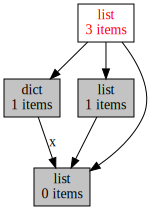

In [64]:
import objgraph

x = []
y = [ x, [x], dict(x=x)]

objgraph.show_refs( [y], filename='sample-graph.png')

In [63]:
cycle()